# Task 1 of Second Machine Learning Homework

**Task**:
- (a) Maximize the function $f(x) = -x^4 + 4x^2 - 2x + 1$, where $f: \mathbb{R} \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and plot the convergence over iterations.
- (b) Maximize the function $f(x, y, z) = -x^2 - y^2 - z^2 + 2xy - yz + 3z$, where $f: \mathbb{R}^3 \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and visualize the optimization path.

### Subtask (a)
Maximize the function $f(x) = -x^4 + 4x^2 - 2x + 1$, where $f: \mathbb{R} \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and plot the convergence over iterations.

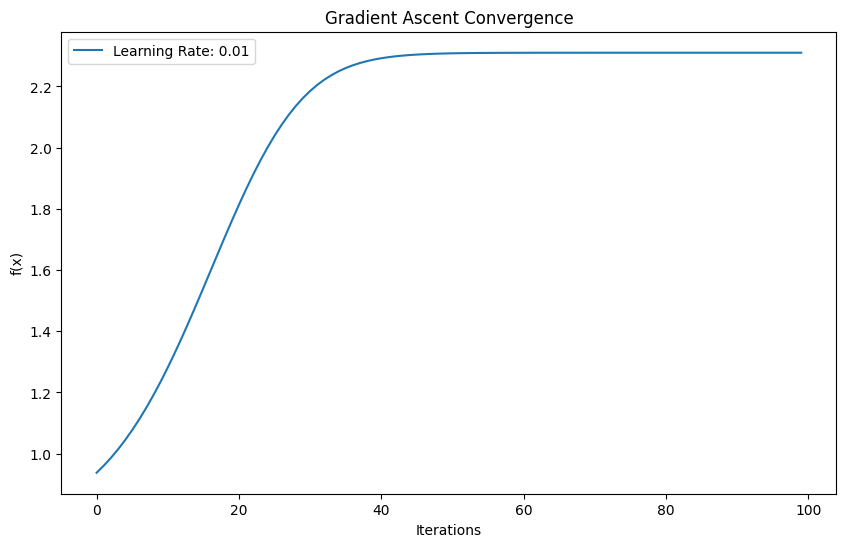

In [4]:
import torch
import matplotlib.pyplot as plt

# Function to be maximized
def f(x):
    return -x**4 + 4*x**2 - 2*x + 1

# Calculate gradient ascent
# Function is called descent like it's described in task 3 (but we do ascent)
def gradient_descent(learning_rate, num_iter=100):
    x = torch.tensor([0.5], requires_grad=True)
    values = []

    for _ in range(num_iter):
        fx = f(x)
        values.append(fx.item())
        
        fx.backward()
        
        with torch.no_grad():
            x += learning_rate * x.grad
            x.grad.zero_()
    
    return values

learning_rates = [0.01]
num_iter = 100

plt.figure(figsize=(10, 6))
for lr in learning_rates:
    values = gradient_descent(learning_rate=lr, num_iter=num_iter)
    plt.plot(values, label=f"Learning Rate: {lr}")

plt.xlabel("Iterations")
plt.ylabel("f(x)")
plt.title("Gradient Ascent Convergence")
plt.legend()
plt.show()


Using a safe learning rate value of 0.01 we reach maximum in ~40 iterations. Using different values of learning rate will be discussed in task 3.

### Subtask (b)
Maximize the function $f(x, y, z) = -x^2 - y^2 - z^2 + 2xy - yz + 3z$, where $f: \mathbb{R}^3 \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and visualize the optimization path.

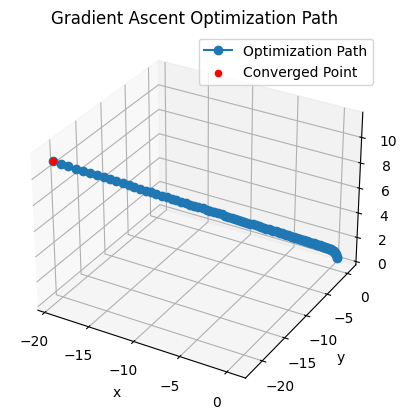

Converged to x = -19.870954513549805, y = -22.570505142211914, z = 11.435477256774902
Maximum value of f(x, y, z) = 154.35311889648438


In [5]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y, z):
    return -x**2 - y**2 - z**2 + 2*x*y - y*z + 3*z

x = torch.tensor([0.5], requires_grad=True)
y = torch.tensor([0.5], requires_grad=True)
z = torch.tensor([0.5], requires_grad=True)

learning_rate = 0.1
num_iterations = 100

path_x, path_y, path_z = [], [], []

for _ in range(num_iterations):
    fx = f(x, y, z)
    
    path_x.append(x.item())
    path_y.append(y.item())
    path_z.append(z.item())
    
    fx.backward()
    
    with torch.no_grad():
        x += learning_rate * x.grad
        y += learning_rate * y.grad
        z += learning_rate * z.grad
        
        x.grad.zero_()
        y.grad.zero_()
        z.grad.zero_()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(path_x, path_y, path_z, marker='o', label="Optimization Path")
ax.scatter(path_x[-1], path_y[-1], path_z[-1], color='red', label="Converged Point")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Gradient Ascent Optimization Path")
ax.legend()
plt.show()

print(f"Converged to x = {x.item()}, y = {y.item()}, z = {z.item()}")
print(f"Maximum value of f(x, y, z) = {f(x, y, z).item()}")